In [301]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker


In [303]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Jet engine/RUL_1_features.csv')

In [304]:
df.head(4)

,ID,Cycle,Opset1,Opset2,Opset3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188


In [305]:
# Remove the column named "ID" from the DataFrame `df`
df = df.drop("ID", axis=1)
df.head(4)

,Cycle,Opset1,Opset2,Opset3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188


In [306]:
# Display the summary statistics
df.describe()

,Cycle,Opset1,Opset2,Opset3,SM1,SM2,SM3,SM4,SM5,SM6,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL
count,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [307]:
# Check the count of unique values per column
df.nunique(axis=0)

,0
Cycle,362
Opset1,158
Opset2,13
Opset3,1
SM1,1
SM2,310
SM3,3012
SM4,4051
SM5,1
SM6,2


<ipython-input-308-2759884116>:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(pad=3)


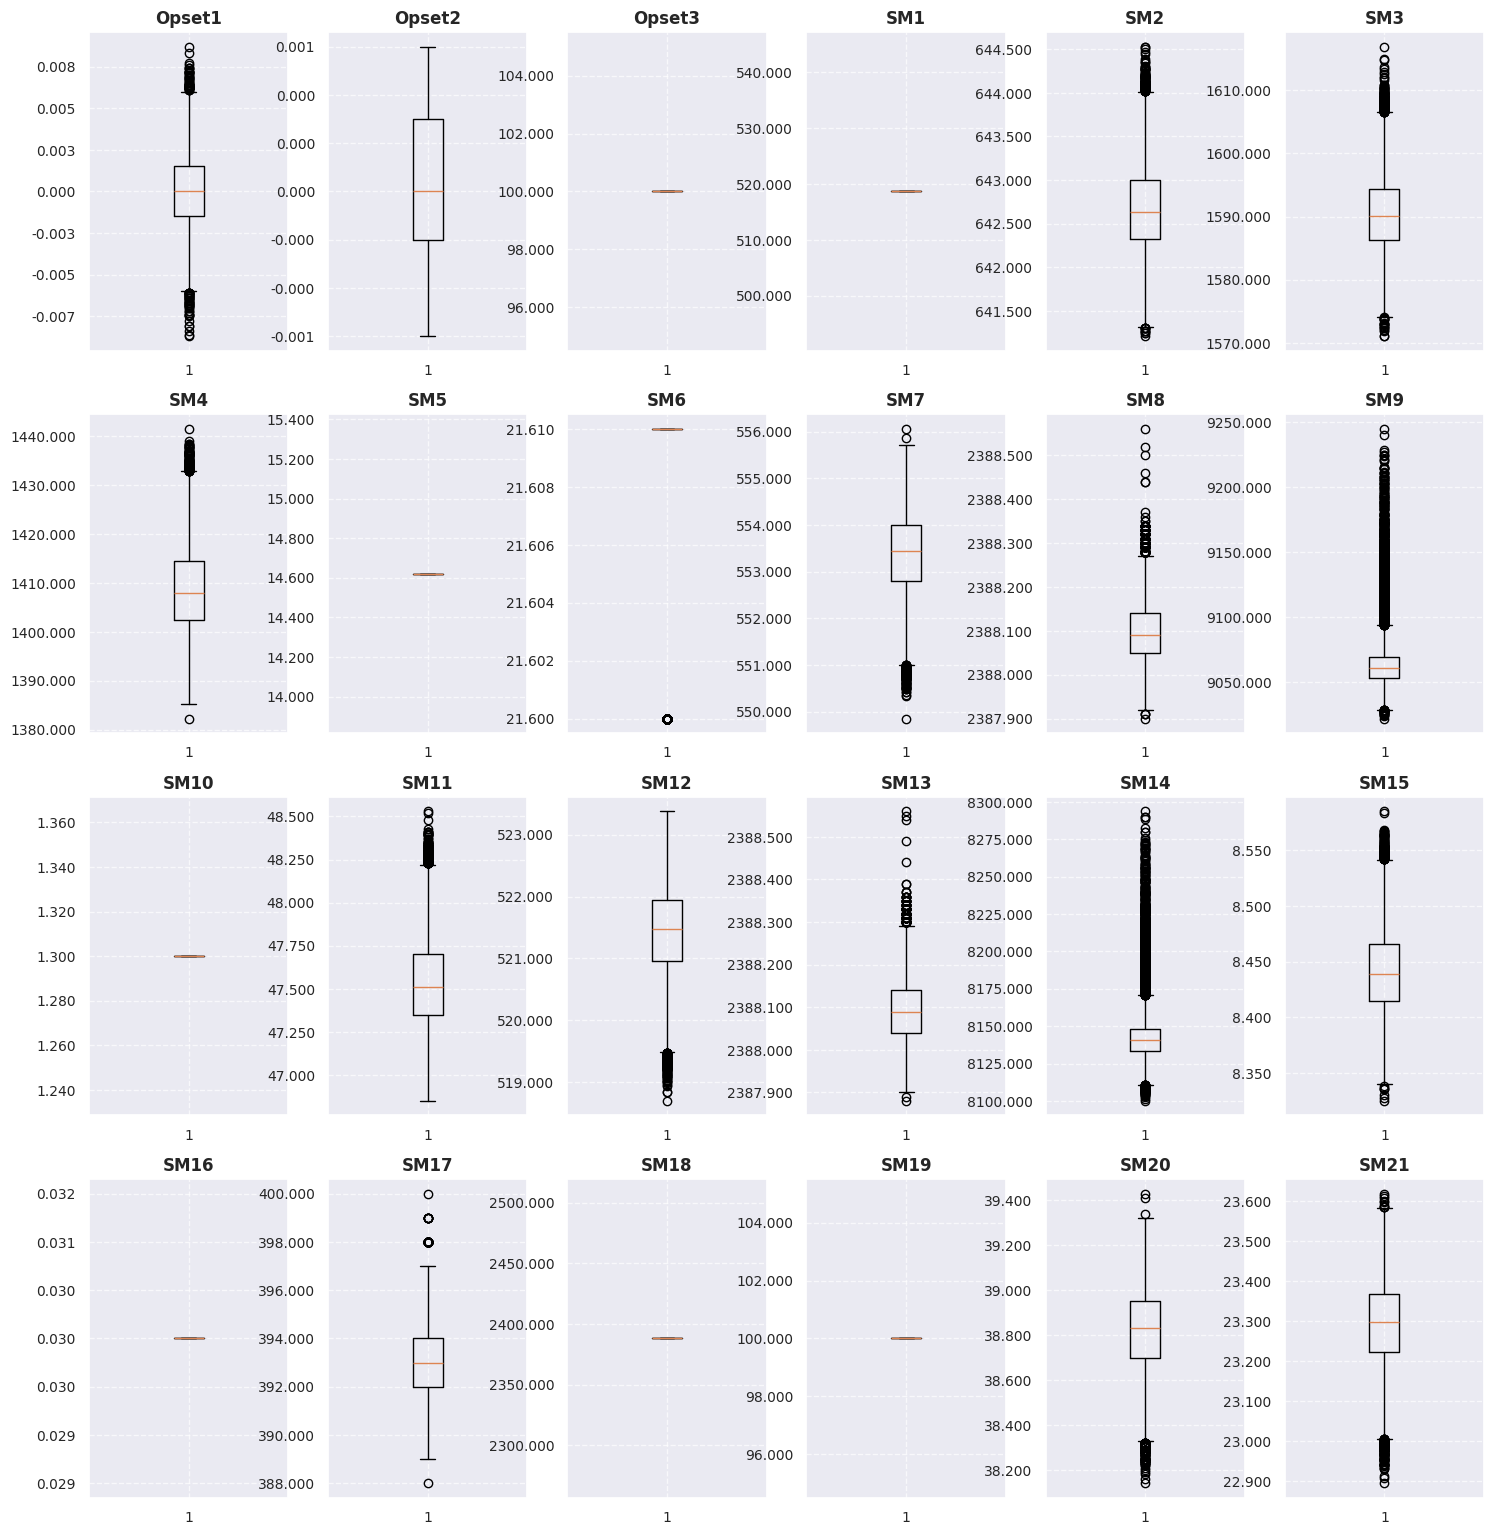

In [308]:
# Box plot

plt.figure(figsize=(18, 24))

for i in range(1, 25):
    ax = plt.subplot(5, 6, i)
    temp = df.iloc[:, i]
    ax.boxplot(temp)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Force y-axis to show plain numbers, no scientific notation
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

plt.tight_layout(pad=3)
plt.show()


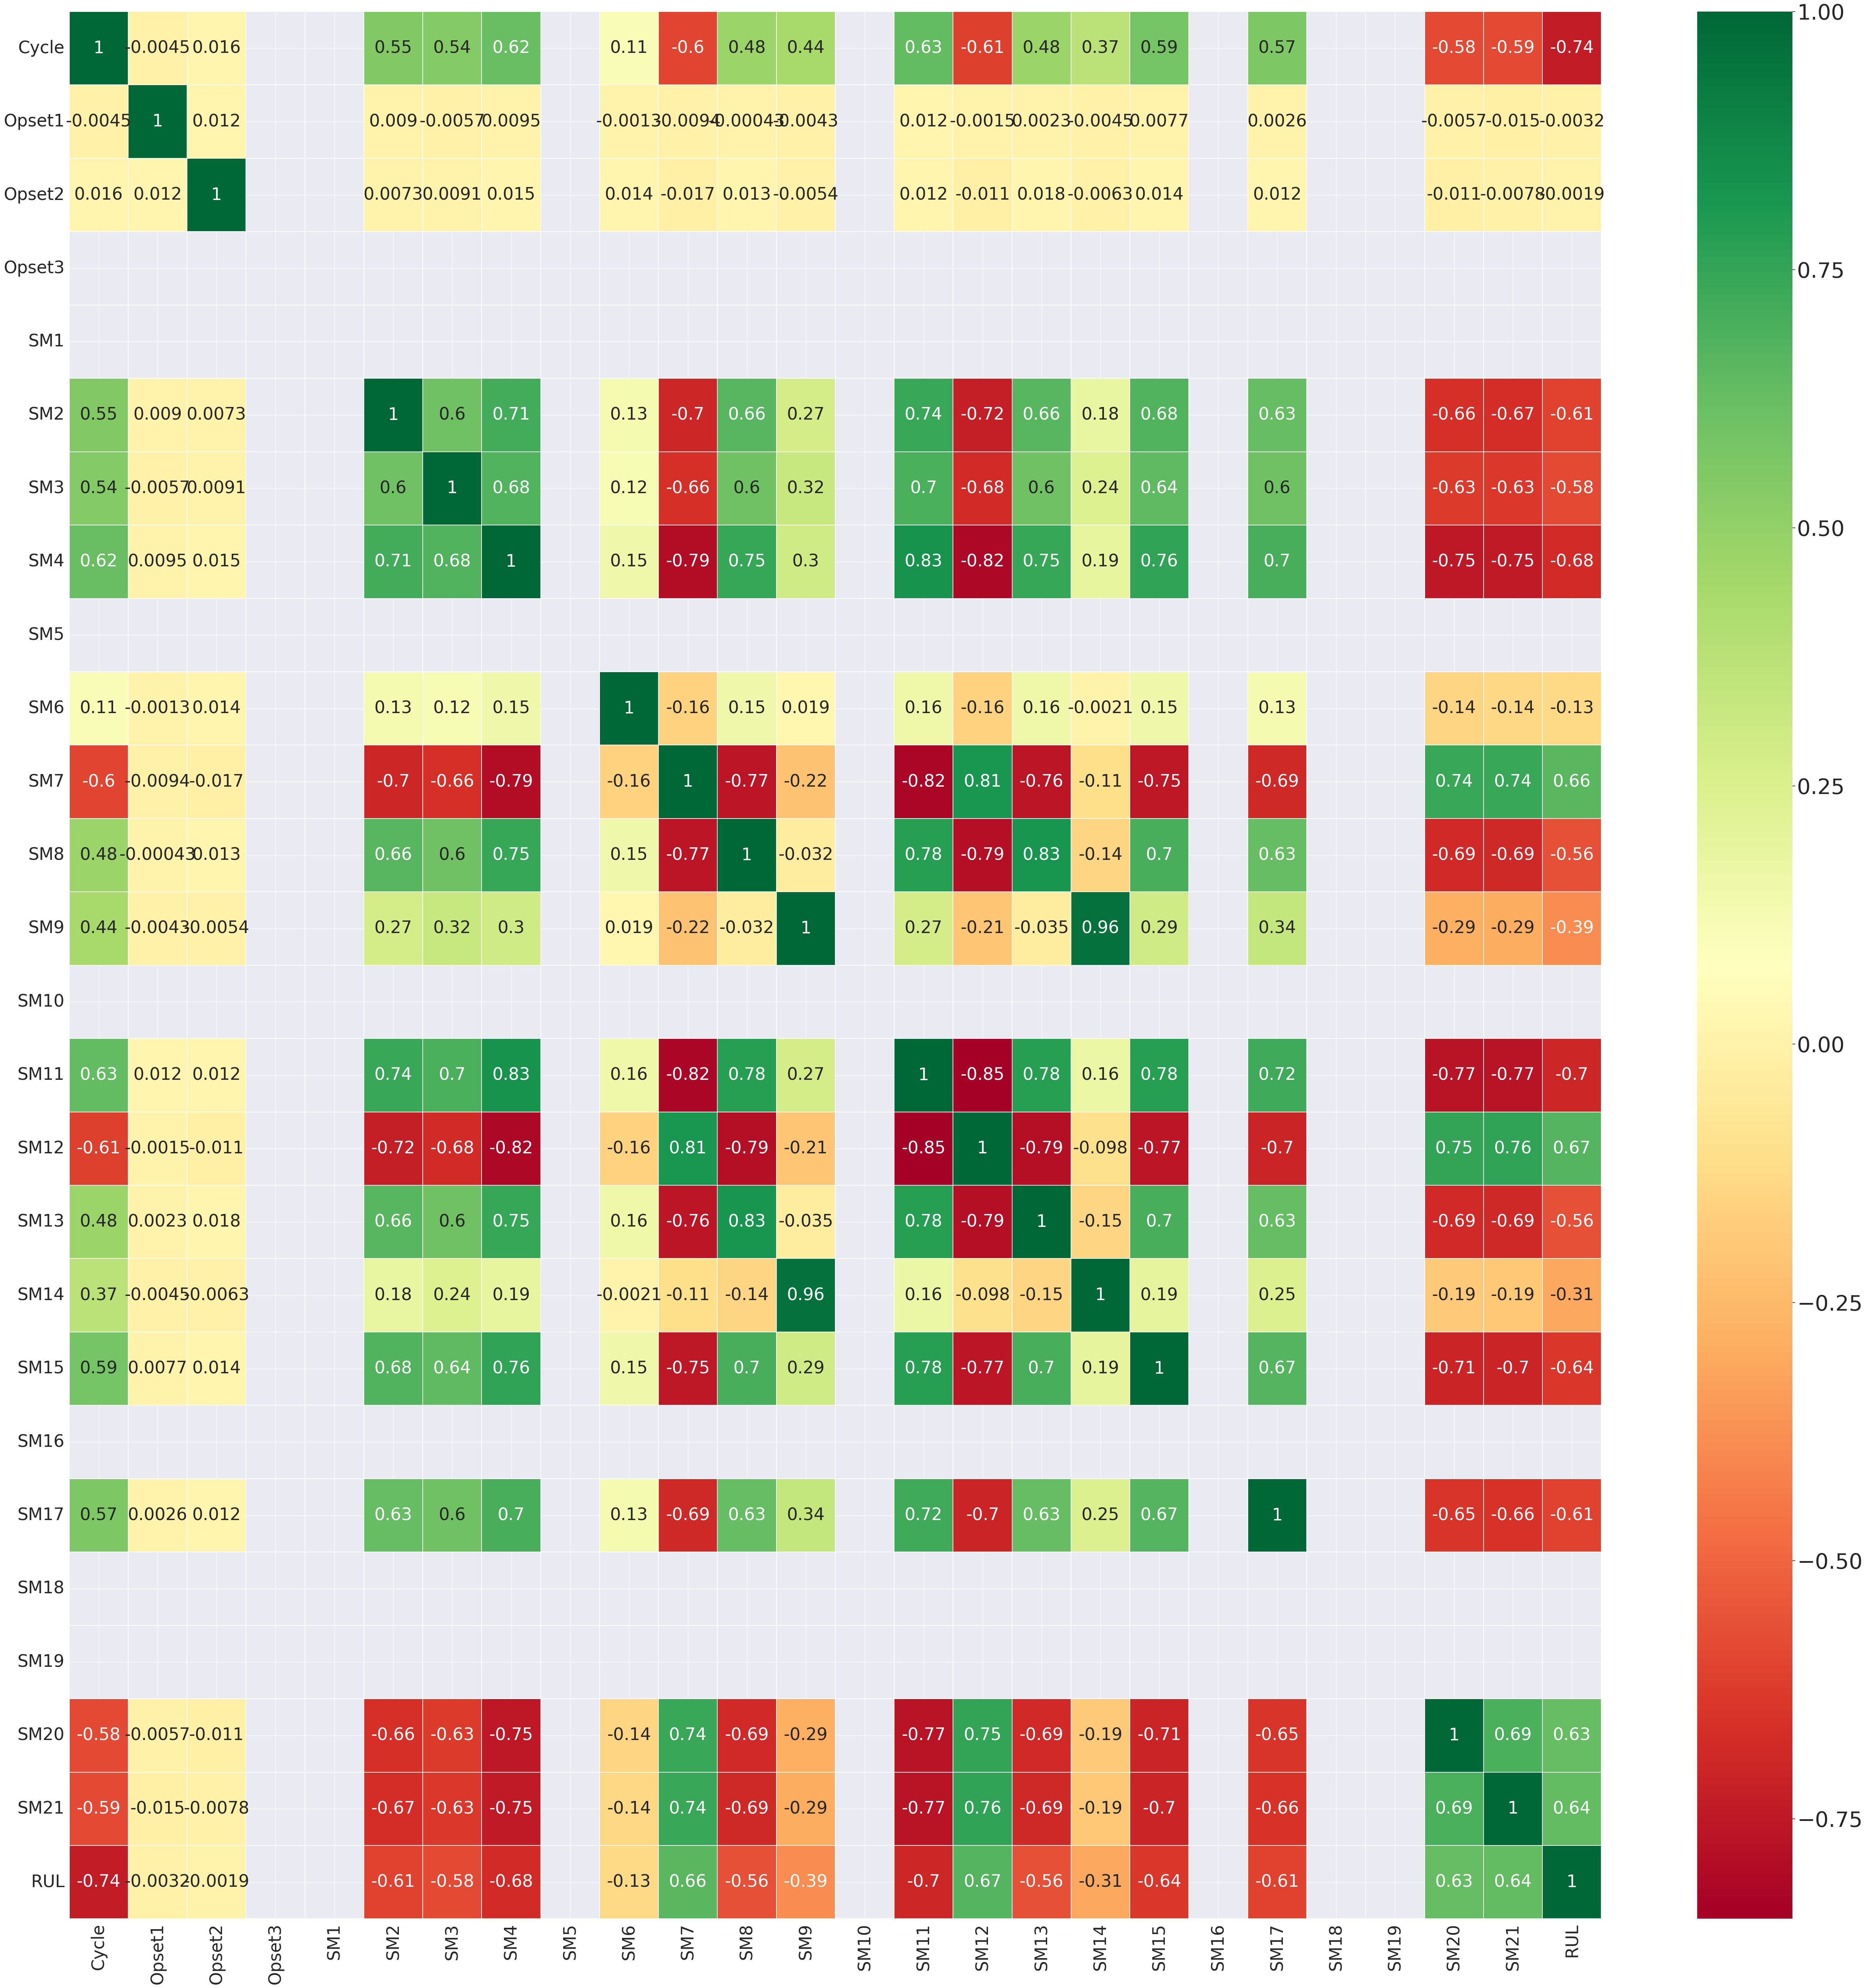

In [309]:
# Compute correlation matrix
corrmat = df.corr()

# Fig size
plt.figure(figsize=(58, 58))

# Font scale only
sns.set(font_scale=4)

# Plot the heatmap
g = sns.heatmap(
    corrmat,
    cmap="RdYlGn",        # Valid colormap
    linewidths=0.1,
    annot=True,
    annot_kws={"size": 35}
)

# Set axis tick label font sizes correctly
g.set_xticklabels(g.get_xticklabels(), fontsize=35)
g.set_yticklabels(g.get_yticklabels(), fontsize=35)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [310]:
# Drop less than 0.5 correlation

delete_columns = []

for col in df.columns:
   corr = df[col].corr(df['RUL'])
   if abs(corr) > 0.5:
       pass
   else:
       delete_columns.append(col)

print(delete_columns)

['Opset1', 'Opset2', 'Opset3', 'SM1', 'SM5', 'SM6', 'SM9', 'SM10', 'SM14', 'SM16', 'SM18', 'SM19']


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [311]:
n_df = df.drop(columns=delete_columns)
n_df

,Cycle,SM2,SM3,SM4,SM7,SM8,SM11,SM12,SM13,SM15,SM17,SM20,SM21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


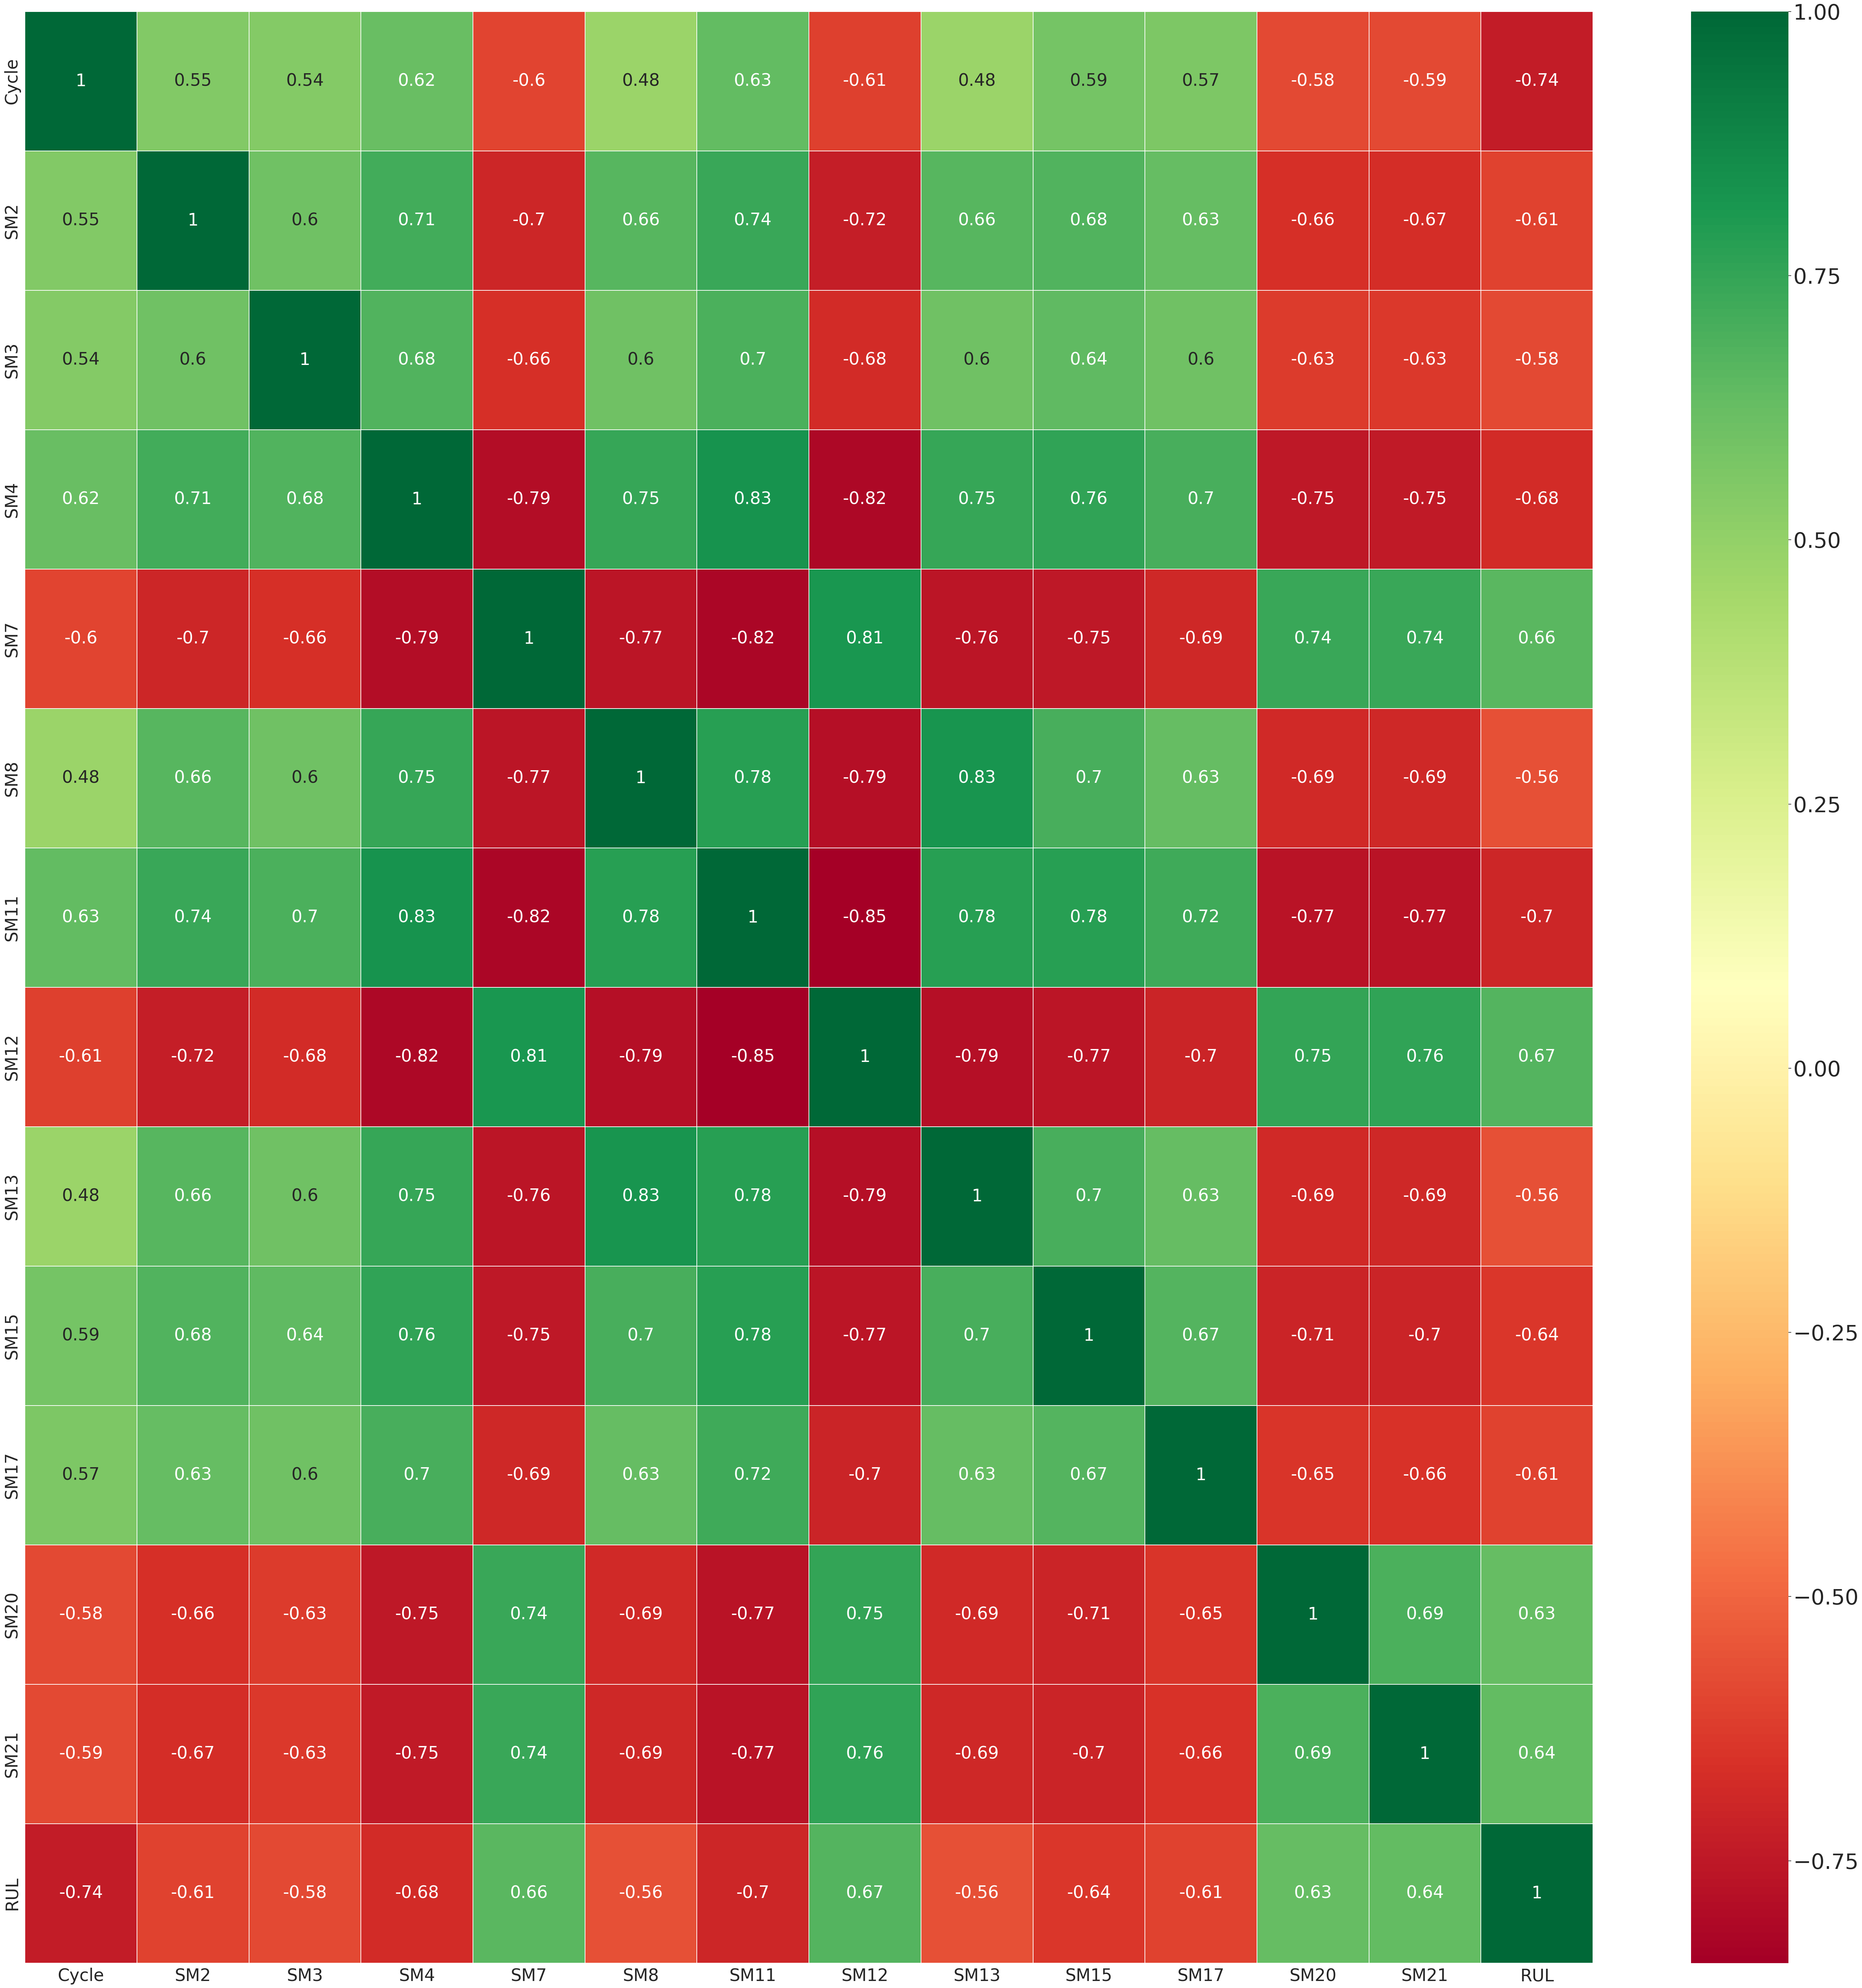

In [312]:
# Compute correlation matrix
corrmat = n_df.corr()

# Set up the figure size
plt.figure(figsize=(58, 58))

# Set font scale only (use default font)
sns.set(font_scale=4)

# Plot the heatmap
g = sns.heatmap(
    corrmat,
    cmap="RdYlGn",        # Valid colormap
    linewidths=0.1,
    annot=True,
    annot_kws={"size": 35}
)

# Set axis tick label font sizes correctly
g.set_xticklabels(g.get_xticklabels(), fontsize=35)
g.set_yticklabels(g.get_yticklabels(), fontsize=35)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [313]:
#Extra tree Regression for feature importance

from sklearn.ensemble import ExtraTreesRegressor

X = n_df.iloc[:, 0:13]
y = n_df.iloc[:, 13]

model = ExtraTreesRegressor()
model.fit(X, y)

print(model.feature_importances_)

[0.36907066 0.03710991 0.03182535 0.07189842 0.07517938 0.02479185
 0.11894939 0.08347613 0.02379376 0.05481202 0.03533725 0.03664699
 0.03710889]


<Axes: >

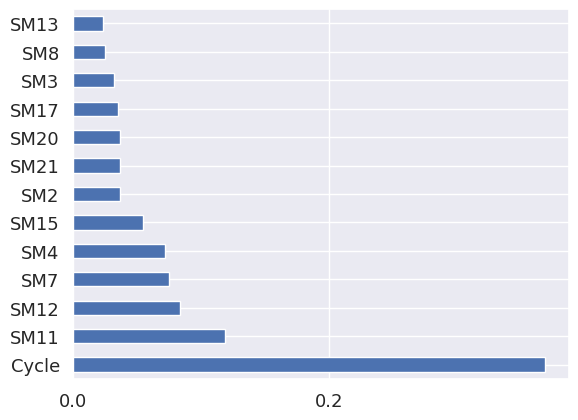

In [314]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(13).plot(kind='barh',fontsize = 13)

In [315]:
#Forward feature

feat_importances.keys()

Index(['Cycle', 'SM2', 'SM3', 'SM4', 'SM7', 'SM8', 'SM11', 'SM12', 'SM13',
       'SM15', 'SM17', 'SM20', 'SM21'],
      dtype='object')

In [316]:
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance descending and get only names
ordered_feature_names = [f for f, _ in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)]

print(ordered_feature_names)


['Cycle', 'SM11', 'SM12', 'SM7', 'SM4', 'SM15', 'SM2', 'SM21', 'SM20', 'SM17', 'SM3', 'SM8', 'SM13']


In [317]:
f_imp=n_df[['Cycle', 'SM11', 'SM4', 'SM12', 'SM7', 'SM15', 'SM21', 'SM20', 'SM17', 'SM2', 'SM3', 'SM13', 'SM8']]

In [318]:
f_imp

,Cycle,SM11,SM4,SM12,SM7,SM15,SM21,SM20,SM17,SM2,SM3,SM13,SM8
0,1,47.47,1400.60,521.66,554.36,8.4195,23.4190,39.06,392,641.82,1589.70,2388.02,2388.06
1,2,47.49,1403.14,522.28,553.75,8.4318,23.4236,39.00,392,642.15,1591.82,2388.07,2388.04
2,3,47.27,1404.20,522.42,554.26,8.4178,23.3442,38.95,390,642.35,1587.99,2388.03,2388.08
3,4,47.13,1401.87,522.86,554.45,8.3682,23.3739,38.88,392,642.35,1582.79,2388.08,2388.11
4,5,47.28,1406.22,522.19,554.00,8.4294,23.4044,38.90,393,642.37,1582.85,2388.04,2388.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,48.07,1428.63,519.49,551.43,8.4956,22.9735,38.49,397,643.49,1597.98,2388.26,2388.19
20627,197,48.04,1433.58,519.68,550.86,8.5139,23.1594,38.30,395,643.54,1604.50,2388.22,2388.23
20628,198,48.09,1428.18,520.01,550.94,8.5646,22.9333,38.44,398,643.42,1602.46,2388.24,2388.24
20629,199,48.39,1426.53,519.67,550.68,8.5389,23.0640,38.29,395,643.23,1605.26,2388.23,2388.25


In [319]:
features = ['SM11', 'SM12', 'SM7', 'SM15', 'SM20', 'SM21', 'SM2', 'SM3', 'SM13', 'SM17', 'SM8']
target = 'RUL'

X = df[features]
y = df[target]

# --- Min-Max Scaling ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [320]:
# Average of each feature values ploted vs RUL

smlist = {}
new_df = pd.DataFrame(X_scaled, columns=features)
new_df['RUL'] = y
for feature in features:
  smlist[feature] = []
  for i in range(0,151):
    sm = new_df.loc[new_df['RUL'] ==  i, feature]
    smlist[feature].append(sm.mean())

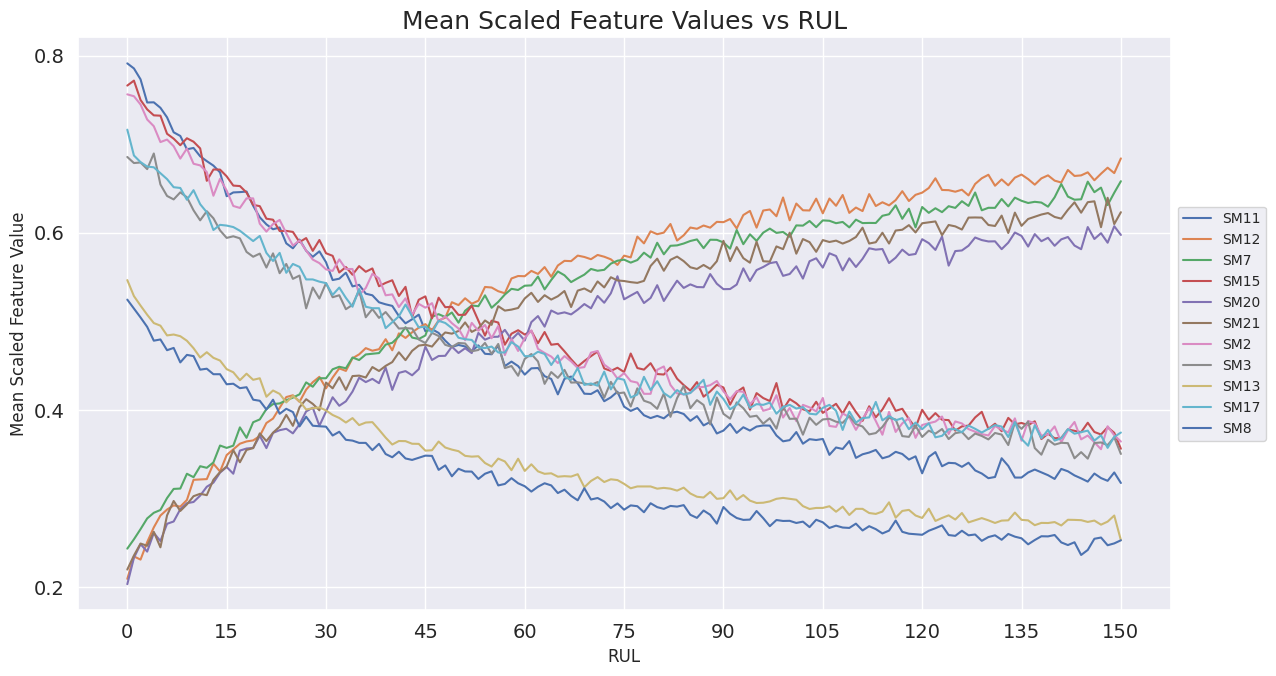

In [321]:
#Plot Mean scaled feature values vs RUL

plt.figure(figsize=(14, 8))

for feature in features:
    plt.plot(range(151), smlist[feature], label=feature)

plt.xlabel('RUL', fontsize=12)
plt.ylabel('Mean Scaled Feature Value', fontsize=12)
plt.title('Mean Scaled Feature Values vs RUL', fontsize=18)
plt.xticks(ticks=np.arange(0, 151, 15), fontsize=14)  # Bigger x-axis tick labels, spaced every 15
plt.yticks(fontsize=14)  # Bigger y-axis tick labels
plt.grid(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)  # Smaller font and outside right

plt.tight_layout()  # Adjust layout so labels fit nicely
plt.show()